In [1]:

import time
import pandas as pd
import glob
import numpy as np
import timeit
import pickle

from multiprocessing import Pool
from matplotlib import pyplot as plt
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
start_time = timeit.default_timer()

# import matplotlib.pyplot as plt

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
#matplotlib.rcParams.update({'font.size': 18})

path_dicts='/mnt/sdb1/sandeep/dicts_chess/'

In [2]:
t_ic=time.time()

file_to_read = open(path_dicts+"dict_CHESS_CAREERS_ALL_YEARS"+".pkl", "rb")
dict_career_MAIN= pickle.load(file_to_read)

t_oc=time.time();
print(t_oc-t_ic,' seconds')

905.0046441555023  seconds


# Fixing my mistake, if an item in the career has length more than 1, extarct it and put it in again

1

In [103]:
t_ic=time.time()
LL=len(dict_career_MAIN.keys())
cc=0
for key_ in dict_career_MAIN:
    career_=dict_career_MAIN[key_]
    cc=cc+1;
    if cc % 10000 == 0:
        t_oc = time.time();
        print('done=','-----',cc/LL)
        with open("/mnt/sdb1/sandeep/0. Careers in chess/0.progress_correcting.txt", "a") as file_object:
            file_object.write(str(cc/LL)+'--i.e.-'+str(cc)+'/'+str(LL)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')
    
    len_career=len(career_)
    issues_=([int(isinstance(elem[0], list)) for elem in career_])

   
    if sum(issues_)>0:
        corrected_version=[]
        issues_=np.array(issues_)
        ind1=np.where(issues_==1);ind1=ind1[0]

        for it in range(len_career):
            if it in ind1:
                corrected_version=corrected_version+career_[it]
            else:
                corrected_version=corrected_version+[career_[it]]
                
        dict_career_MAIN[key_]=corrected_version   
        


done= ----- 0.010215882018821742
done= ----- 0.020431764037643484
done= ----- 0.030647646056465222
done= ----- 0.04086352807528697
done= ----- 0.051079410094108706
done= ----- 0.061295292112930444
done= ----- 0.07151117413175219
done= ----- 0.08172705615057393
done= ----- 0.09194293816939567
done= ----- 0.10215882018821741
done= ----- 0.11237470220703916
done= ----- 0.12259058422586089
done= ----- 0.13280646624468265
done= ----- 0.14302234826350438
done= ----- 0.1532382302823261
done= ----- 0.16345411230114787
done= ----- 0.1736699943199696
done= ----- 0.18388587633879133
done= ----- 0.1941017583576131
done= ----- 0.20431764037643482
done= ----- 0.21453352239525655
done= ----- 0.2247494044140783
done= ----- 0.23496528643290004
done= ----- 0.24518116845172178
done= ----- 0.2553970504705435
done= ----- 0.2656129324893653
done= ----- 0.275828814508187
done= ----- 0.28604469652700876
done= ----- 0.2962605785458305
done= ----- 0.3064764605646522
done= ----- 0.31669234258347395
done= ----- 0

In [126]:
file_write=path_dicts+"dict_CAREERS_ALL_YEARS_corrected"+".pkl"
with open(file_write, 'wb') as f:
    pickle.dump(dict_career_MAIN, f, pickle.HIGHEST_PROTOCOL)


In [98]:
# print(len(career_),len(career_[ind1[0]]),career_[ind1[0]])
# print(len(corrected_version),len(career_[ind1[0]]),corrected_version[ind1[0]])

1 44 ['Rated Classical game', '600+0', 'juancardls', 'iwannabelikemike', '0-1', '2016.12.31', '22:57:03', '1500', '1353', "Van't Kruijs Opening", '1. e3 d5 2. Nf3 Nc6 3. Bb5 Bd7 4. c3 e5 5. d4 e4 6. Ne5 Bd6 7. Ng4 Nf6 8. h3 O-O 9. b3 a6 10. Ba3 axb5 11. Nd2 Bxa3 12. Rb1 b4 13. cxb4 Bxb4 14. O-O Rxa2 15. Ra1 Rxd2 16. Qe1 Rc2 17. Qd1 Rb2 18. Ra4 Qe7 19. Qa1 Bc3 20. Ra8 Rxb3 21. Rc1 Bxa1 22. Rcxa1 Ne8 23. Ne5 Nxe5 24. dxe5 Qxe5 25. R1a2 Rb1# 0-1\n']


In [78]:
# cc=0
# for key_ in dict_career_MAIN:
#     career_=dict_career_MAIN[key_]
#     for it in range(len(career_)):
#         if len(career_[it]) >11:
#             cc=cc+1;
#             print(len(career_[it]))
            
#         if cc>1: break
        

# Filtered to careers with >100 games

In [9]:
# dict_career_FILTERED={}
# for key_ in dict_career_MAIN:
#     career_=dict_career_MAIN[key_]
#     if len(career_) >=100 and len(career_) <50000:
#         dict_career_FILTERED.setdefault(key_, []).append(career_)
        
        


In [ ]:
# file_write=path_dicts+"dict_ALL_CAREERS_corrected"+".pkl"
# with open(file_write, 'wb') as f:
#     pickle.dump(dict_career_FILTERED, f, pickle.HIGHEST_PROTOCOL)
    

[['Rated Classical game',
  '600+0',
  'juancardls',
  'iwannabelikemike',
  '0-1',
  '2016.12.31',
  '22:57:03',
  '1500',
  '1353',
  "Van't Kruijs Opening",
  '1. e3 d5 2. Nf3 Nc6 3. Bb5 Bd7 4. c3 e5 5. d4 e4 6. Ne5 Bd6 7. Ng4 Nf6 8. h3 O-O 9. b3 a6 10. Ba3 axb5 11. Nd2 Bxa3 12. Rb1 b4 13. cxb4 Bxb4 14. O-O Rxa2 15. Ra1 Rxd2 16. Qe1 Rc2 17. Qd1 Rb2 18. Ra4 Qe7 19. Qa1 Bc3 20. Ra8 Rxb3 21. Rc1 Bxa1 22. Rcxa1 Ne8 23. Ne5 Nxe5 24. dxe5 Qxe5 25. R1a2 Rb1# 0-1\n']]

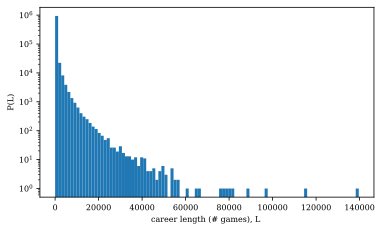

In [104]:

career_len=[]
cc=0
for key_ in dict_career_MAIN:
    career_len.append(len((dict_career_MAIN[key_])))
#     cc=cc+1; 
#     if cc>10: break;

fig = plt.figure(0,figsize=(6, 3.5));
ax = fig.add_subplot(1, 1, 1);
ax.hist(career_len,100);

# ax.legend(store_lines,leg_,loc=(1.04,0));
ax.set(xlabel="career length (# games), L ", ylabel='P(L)');
ax.set_yscale('log',base=10)

# ax.set_xticks(xtick_s)
# ax.set_xlim(1,100);

In [128]:
career_len=np.array(career_len)
ind=np.where(career_len>500)
print(len(ind[0]),len(career_len))
# 188205 978868


92864 978868


In [91]:
cc=0;
for key_ in dict_career_MAIN.keys():
    print(key_); cc=cc+1
    if cc>5:    break

BFG9k
mamalak
Desmond_Wilson
savinka59
Kozakmamay007
VanillaShamanilla


In [137]:
len(dict_career_MAIN['Kozakmamay007'])

[x[0] for x in dict_career_MAIN['Kozakmamay007']]

['Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Classical game',
 'Rated Bullet game',
 'Rated Bullet game',
 'Rated Bullet game',
 'Rated Bullet game',
 'Rated Classical game',
 'Rated Bullet game',
 'Rated Bullet game',
 'Rated Bullet game',
 'Rated Bullet game',
 'Rated Blitz game',
 'Rated Blitz game',
 'Rated Blitz game',
 'Rated Blitz game',
 'Rated Blitz game',
 'Rated Bullet game',
 'Rated Blitz game',
 'Rated Blitz game',
 'Rated Bullet game',
 'Rated Bullet game',
 'Rated Bullet game',
 'Rated Bullet game',
 'Rated Bullet game',
 'Rated Bullet game',
 'Rated Bullet game',
 'Rated Bullet game',
 'Rated Bullet game',
 'Rated

In [106]:
from datetime import datetime

t_ic=time.time()
LL=len(dict_career_MAIN.keys())
cc=0


store_career_duration=[]

for key_ in dict_career_MAIN:
    career_=dict_career_MAIN[key_]
    cc=cc+1;
# 
    len_career=len(career_)
    if len_career>=100:
        it=0
        date_time_it=career_[it][5]+' '+career_[it][6]
        t0_ = datetime.strptime(date_time_it, '%Y.%m.%d %H:%M:%S')

        it=len_career-1
        date_time_it=career_[it][5]+' '+career_[it][6]
        t1_ = datetime.strptime(date_time_it, '%Y.%m.%d %H:%M:%S')

        store_career_duration.append(t1_-t0_)

        if cc % 10000 == 0:
            t_oc = time.time();
            print('done=','-----',cc/LL)
            with open("/mnt/sdb1/sandeep/0. Careers in chess/0.progress_career_dur.txt", "a") as file_object:
                file_object.write(str(cc/LL)+'--i.e.-'+str(cc)+'/'+str(LL)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')



done= ----- 0.051079410094108706
done= ----- 0.1941017583576131
done= ----- 0.275828814508187
done= ----- 0.33712410662111747
done= ----- 0.3984193987340479
done= ----- 0.40863528075286965
done= ----- 0.4188511627716914
done= ----- 0.4494988088281566
done= ----- 0.4699305728658001
done= ----- 0.510794100941087
done= ----- 0.5210099829599087
done= ----- 0.5414417469975523
done= ----- 0.5823052750728392
done= ----- 0.592521157091661
done= ----- 0.6027370391104827
done= ----- 0.6436005671857696
done= ----- 0.6640323312234132
done= ----- 0.7151117413175219
done= ----- 0.7559752693928088
done= ----- 0.7661911514116305
done= ----- 0.9296452637127784


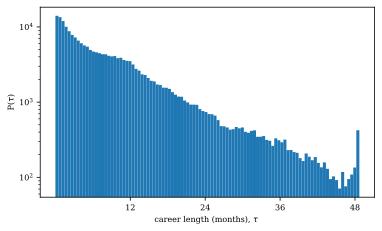

In [125]:
fig = plt.figure(0,figsize=(6, 3.5));
ax = fig.add_subplot(1, 1, 1);
def datetime_to_float(d):
#     epoch = datetime.utcfromtimestamp(0)
    total_seconds =  (d).total_seconds()/3600/24/30
    # total_seconds will be in decimals (millisecond precision)
    return total_seconds
X=[datetime_to_float(x) for x in store_career_duration]
ax.hist(X,100);

# ax.legend(store_lines,leg_,loc=(1.04,0));
ax.set(xlabel=r"career length (months), $\tau$ ", ylabel=r'P($\tau$)');
ax.set_yscale('log',base=10)
ax.set_xticks(np.linspace(12,48,4));
